In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
data = pd.read_excel('./data/price/매매가격대비전세가격_평균가격_종합.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data = data.loc[[0,1,2]]
data.set_index('지 역' ,inplace=True)
data

,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,2012년 10월,...,2021년 06월,2021년 07월,2021년 08월,2021년 09월,2021년 10월,2021년 11월,2021년 12월,2022년 01월,2022년 02월,2022년 03월
지 역,,,,,,,,,,,,,,,,,,,,,
전국,57.4,57.5,57.5,57.6,57.6,57.7,57.8,57.9,58.2,58.5,...,64.2,64.5,64.3,64.1,64.0,63.9,63.8,63.8,63.8,63.8
수도권,54.1,54.2,54.3,54.4,54.4,54.6,54.7,54.9,55.4,55.8,...,63.7,64.2,64.0,63.7,63.5,63.3,63.3,63.3,63.3,63.2
지방권,60.5,60.5,60.5,60.5,60.6,60.6,60.7,60.7,60.8,60.9,...,64.8,64.7,64.6,64.5,64.4,64.3,64.3,64.3,64.3,64.3


In [ ]:
ndf = data[['2020년 07월', '2020년 10월', '2021년 01월', '2021년 04월', '2021년 07월', '2021년 10월', '2022년 01월']]

C:\Users\User\AppData\Local\Temp\ipykernel_7792\614769568.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ndf.columns, fontsize=11)


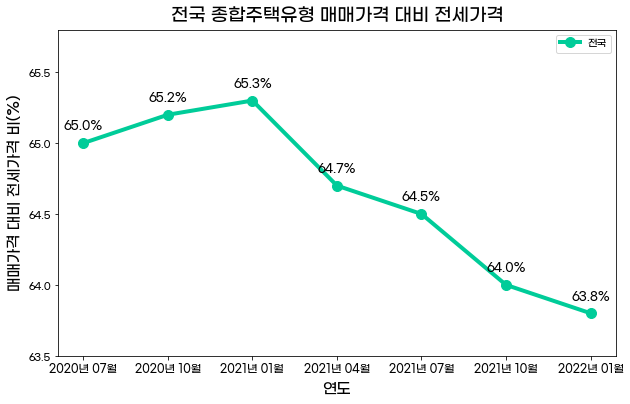

In [9]:
colors = sns.color_palette('BuGn',len(ndf.columns))

fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

line1 = ax.plot(ndf.columns, ndf.loc['전국'], label='전국', linewidth=4, color ='#00CC99', marker='o', markersize=10)
line1 = line1[0]

for coord in list(line1.get_xydata()):
    ax.text(coord[0],coord[1]+0.1,f'{coord[1]}%',fontsize=12, ha='center')

ax.set_title('전국 종합주택유형 매매가격 대비 전세가격',size=18, pad=10)


ax.set_xticklabels(labels=ndf.columns, fontsize=11)
ax.set_xlabel('연도', fontsize = 15)
ax.set_ylabel('매매가격 대비 전세가격 비(%)', fontsize = 15)
               
ax.legend(loc='best')

plt.savefig('output/전세가율_현황.png')

In [57]:
data.T.index

Index(['2018년 01월', '2018년 07월', '2019년 01월', '2019년 07월', '2020년 01월',
       '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월'],
      dtype='object')